# 0.) Import the US Perminent Visas using zip extractor

In [2]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/Users/Cade/Downloads/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/var/folders/wb/934yx_bd79jfvxjrx9p80p1m0000gn/T/ipykernel_60127/2549643881.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('us_perm_visas.csv'))


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [5]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [13]:
df_select = df[["case_status", "class_of_admission", "foreign_worker_info_education", "foreign_worker_info_birth_country"]]

# 3.) Clean your data for a decision tree


In [42]:
X = pd.get_dummies(df_select[["class_of_admission", "foreign_worker_info_education", "foreign_worker_info_birth_country"]], prefix = '', prefix_sep='')
y = df["case_status"]

# 4.) Fit and plot a decision tree of depth X


In [43]:
from sklearn import tree

In [48]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'H-1B <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.25, 0.625, 'L-1 <= 0.5\ngini = 0.642\nsamples = 91344\nvalue = [42621, 31744, 11336, 5643]'),
 Text(0.125, 0.375, 'EWI <= 0.5\ngini = 0.66\nsamples = 71406\nvalue = [32675, 22948, 10777, 5006]'),
 Text(0.0625, 0.125, 'gini = 0.656\nsamples = 69451\nvalue = [32163, 22396, 9963, 4929]'),
 Text(0.1875, 0.125, 'gini = 0.677\nsamples = 1955\nvalue = [512, 552, 814, 77]'),
 Text(0.375, 0.375, 'INDIA <= 0.5\ngini = 0.555\nsamples = 19938\nvalue = [9946, 8796, 559, 637]'),
 Text(0.3125, 0.125, 'gini = 0.551\nsamples = 17032\nvalue = [9030, 6932, 507, 563]'),
 Text(0.4375, 0.125, 'gini = 0.488\nsamples = 2906\nvalue = [916, 1864, 52, 74]'),
 Text(0.75, 0.625, 'INDIA <= 0.5\ngini = 0.583\nsamples = 283018\nvalue = [139312, 116842, 14313, 12551]'),
 Text(0.625, 0.375, "Bachelor's <= 0.5\ngini = 0.583\nsamples = 239043\nvalue = [119778, 96100, 12513, 10652]"),
 Text(0.5625, 0.125, 'gin

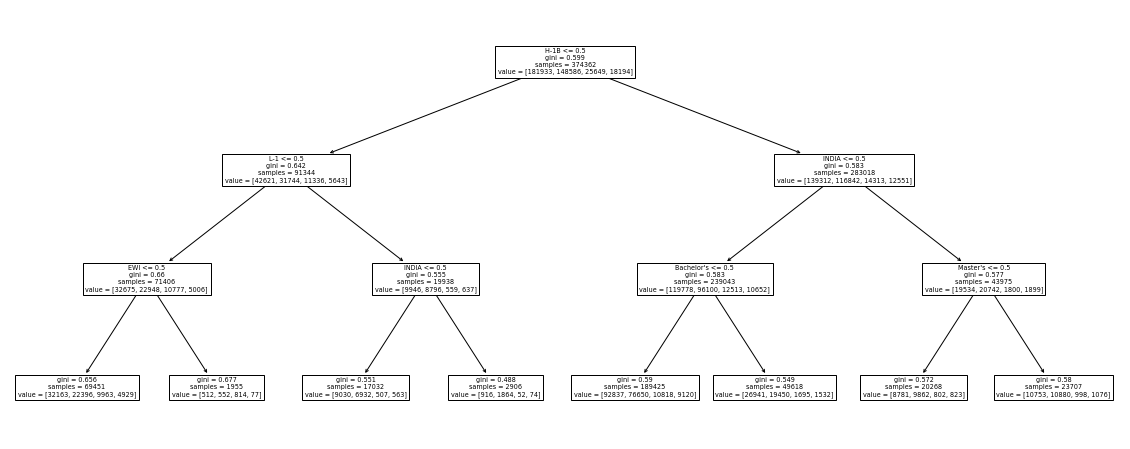

In [49]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [ ]:
#Largest leaf node is non-H1B applicants who are indian and have a bachelor's degree.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
max_depths = [1,5,10]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for md in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth = md)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    oos_accuracy = accuracy_score(y_test, y_pred)
    outputs.append(oos_accuracy)

In [57]:
outputs

[0.48792171598001943, 0.4928100152258501, 0.49442164029596913]

In [ ]:
#Pretty small difference in accuracy with increasing max depth, but there's a subtle improvement.